In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

date = '2022-04-11'     # change to the date that you want to plot the figure

# read csv file
file_path = os.path.join(os.getcwd(), 'csv_files', f'output_{date}.csv') 
columns = ['Request time', 'Counter', 'Last update time']
df = pd.read_csv(file_path, usecols=columns)

# figure path
figure_dir = os.path.join(os.getcwd(), 'figures')
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)

In [8]:
def set_subplot(ax, data_x, data_y):
    # plot reference line (y = 40)
    refl_x = np.linspace(0, len(data_x), 500)
    refl_y = refl_x * 0 + 40
    ax.plot(refl_x, refl_y, label='#people = 40', color='#FF0000', alpha=0.8)
    
    # plot the data
    ax.plot(data_y, label='instant #people', color='#0000CD', alpha=0.8, marker='o', markersize='5')
    
    # settings of plot
    ax.legend()
    ax.set_xticks(np.arange(len(data_x)))
    ax.set_xticklabels(data_x)
    plt.xticks(rotation=7)
    plt.xticks(np.arange(0, len(data_x), 6), [f'{data_x[i]}' for i in np.arange(0, len(data_x), 6)])
    plt.yticks([0, 10, 30, 35, 40, 45], ['0', '10', '30', '35', '40', '45\n(full)'])
    plt.ylim(-1,48)
    plt.ylabel('#people')
    plt.grid(linestyle=':', color='gray')
    
    return ax

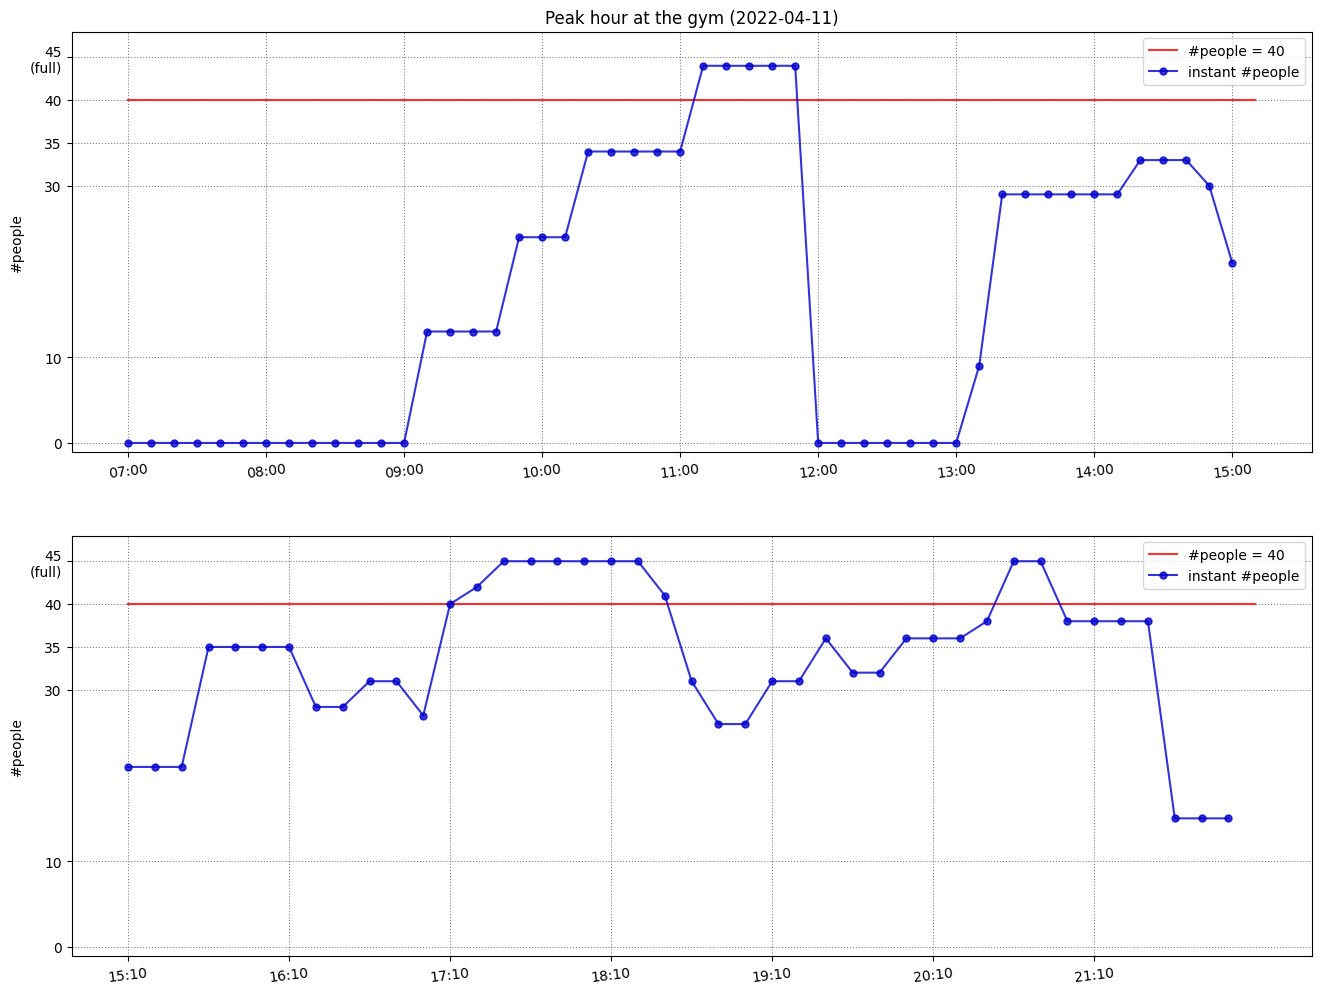

In [9]:
# preprecessing tm and cntr
tm = [t.split()[1].split(':')[0:2] for t in df[columns[0]]]     # tm = '['hr', 'min']'
tm = [t[0].zfill(2) + ':' + t[1].zfill(2) for t in tm]          # tm = 'HH:MM'
cnt = np.array(df[columns[1]])
div_hour = 8                                                    # 7 ~ 14 division hour
pph = 6                                                         # sample points per hr

fig = plt.figure()
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (16.0, 12.0)
###
ax1 = plt.subplot(2, 1, 1)
ax1 = set_subplot(ax=ax1, data_x=tm[0: div_hour*pph+1], data_y=cnt[0: div_hour*pph+1] )
plt.title(f'Peak hour at the gym ({date})')

ax2 = plt.subplot(2, 1, 2)
ax2 = set_subplot(ax=ax2, data_x=tm[div_hour*pph+1:], data_y=cnt[div_hour*pph+1:])
###
fig_path = os.path.join(figure_dir, f'fig_{date}')
plt.savefig(fig_path)
plt.show()

# print(f'Save file at {fig_path}')